In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import time, math, random
from typing import Tuple
import matplotlib.pyplot as plt

from IPython import display
!pip install gym[classic_control]
!pip install pygame

import os
os.environ['SDL_VIDEODRIVER']='dummy'
#import pygame
#pygame.display.set_mode((640,480))

# import gym
import gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install -y xvfb x11-utils
!pip install gym[all]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils
  xfonts-base xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
  x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 38 not upgraded.
Need to get 7,920 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu f

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import time, math, random
from typing import Tuple
import matplotlib.pyplot as plt

from IPython import display
!pip install gym[classic_control]
!pip install pygame

import os
os.environ['SDL_VIDEODRIVER']='dummy'
#import pygame
#pygame.display.set_mode((640,480))

# import gym
import gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import random
import gym


In [ ]:
env = gym.make('CartPole-v1')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
#Simple policy function
policy = lambda _,__,___, tip_velocity : int( tip_velocity > 0 )

In [ ]:
n_bins = ( 6 , 12 )
lower_bounds = [ env.observation_space.low[2], -math.radians(50) ]
upper_bounds = [ env.observation_space.high[2], math.radians(50) ]

def discretizer( _ , __ , angle, pole_velocity ) -> Tuple[int,...]:
    """Convert continues state intro a discrete state"""
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    est.fit([lower_bounds, upper_bounds ])
    return tuple(map(int,est.transform([[angle, pole_velocity]])[0]))

In [ ]:
Q_table = np.zeros(n_bins + (env.action_space.n,))
Q_table.shape

(6, 12, 2)

In [ ]:
def policy( state : tuple ):
    """Choosing action based on epsilon-greedy policy"""
    return np.argmax(Q_table[state])

In [ ]:
def new_Q_value( reward : float ,  new_state : tuple , discount_factor=1 ) -> float:
    """Temperal diffrence for updating Q-value of state-action pair"""
    future_optimal_value = np.max(Q_table[new_state])
    learned_value = reward + discount_factor * future_optimal_value
    return learned_value

In [ ]:
# Adaptive learning of Learning Rate
def learning_rate(n : int , min_rate=0.01 ) -> float  :
    """Decaying learning rate"""
    return max(min_rate, min(1.0, 1.0 - math.log10((n + 1) / 25)))

In [ ]:
def exploration_rate(n : int, min_rate= 0.1 ) -> float :
    """Decaying exploration rate"""
    return max(min_rate, min(1, 1.0 - math.log10((n  + 1) / 25)))

In [ ]:
import cv2 as cv

KeyboardInterrupt: ignored

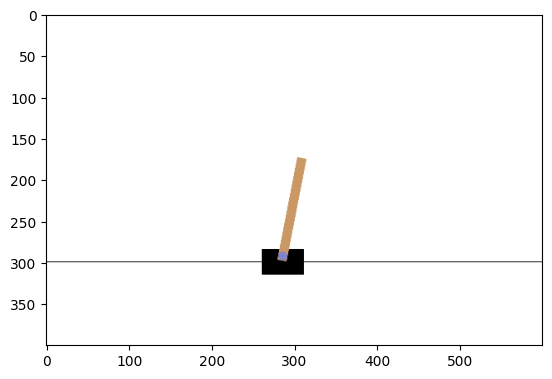

In [ ]:
from numpy.lib.type_check import imag
n_episodes = 100

for e in range(n_episodes):

    # Siscretize state into buckets
    current_state, done = discretizer(*env.reset()), False

    while done==False:

        # policy action
        action = policy(current_state) # exploit

        # insert random action
        if np.random.random() < exploration_rate(e) :
            action = env.action_space.sample() # explore

        # increment enviroment
        obs, reward, done, _ = env.step(action)
        new_state = discretizer(*obs)

        # Update Q-Table
        lr = learning_rate(e)
        learnt_value = new_Q_value(reward , new_state )
        old_value = Q_table[current_state][action]
        Q_table[current_state][action] = (1-lr)*old_value + lr*learnt_value

        current_state = new_state

        # Render the cartpole environment


        screen = env.render(mode='rgb_array') # 현재 환경을 'rgb_array'로 출력하여 screen 변수로 저장합니다.
        display.clear_output(wait=True) # display에 이미지를 지워줍니다. display하기 전에 하는 이유는 초기화하는 것으로 생각하면 됩니다.
        display.display(plt.gcf()) # 현재 figure의 정보를 display에 출력합니다.
        plt.imshow(screen) # screen 배열을 이미지로 출력합니다.
        env.step(env.action_space.sample()) # sample action을 통해 다음 step으로 진행합니다.
    plt.close() # 종료 후 plot을 닫습니다.
    env.close() # 종료 후 env를 닫습니다.